In [1]:
import torch as tch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erf
import math

In [2]:
# Define a nonlinear function
def f(x):
  return np.exp(-np.exp(np.cos(x))) + np.random.normal(0, 0.1, len(x))

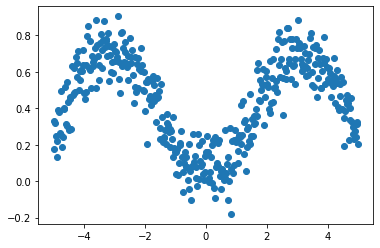

In [3]:
# Visualize 
x = np.linspace(-5, 5, 400)
y = f(x)
plt.scatter(x,y);

In [4]:
# Define a neural network 
# with custom layers/activations
class MyNet(nn.Module):
  def __init__(self, D_in, H, D_out):
    """
    Custom network with sine activation.

    args:
    -----
    D_in:: dimension of the input
    H:: dimension of the hidden layer(s)
    D_out:: dimension of the output
    """
    super(MyNet, self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)
    self.sin = tch.sin
    return 

  def forward(self, x):
    out = self.linear1(x)
    out = self.sin(out)
    out = self.linear2(out)

    return out 

In [5]:
# Put np.arrays into tch.tensors
X = tch.tensor(x.reshape(-1,1)).float()
Y = tch.tensor(y.reshape(-1,1)).float()

# Split into train and test sets (70/30)
ntrain = int(0.85*len(X))
idx = tch.tensor(np.random.choice(np.arange(len(X)), ntrain, replace=False))
xtrain = X[idx]
xtest = X[~idx]
ytrain = Y[idx]
ytest = Y[~idx]

In [6]:
# Initialize model object
model = MyNet(1, 4, 1)

In [7]:
# Define optimizer and loss function
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

In [8]:
# Train the model
it = 0
loss_val = 10
while (loss_val > 1e-4) and (it < 5000):
  y_pred = model(xtrain)
  loss = loss_fn(y_pred, ytrain)
  loss_val = loss.item()

  if it % 500 == 0:
    print("Epoch: {}, Loss: {}".format(it, loss_val))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  it += 1
print("Loss after all iterations: ", loss_val)

Epoch: 0, Loss: 0.7596520781517029
Epoch: 500, Loss: 0.012831835076212883
Epoch: 1000, Loss: 0.009529255330562592
Epoch: 1500, Loss: 0.009526441805064678
Epoch: 2000, Loss: 0.00952315516769886
Epoch: 2500, Loss: 0.009518797509372234
Epoch: 3000, Loss: 0.009513086639344692
Epoch: 3500, Loss: 0.009505615569651127
Epoch: 4000, Loss: 0.009495766833424568
Epoch: 4500, Loss: 0.009482650086283684
Loss after all iterations:  0.0094651710242033


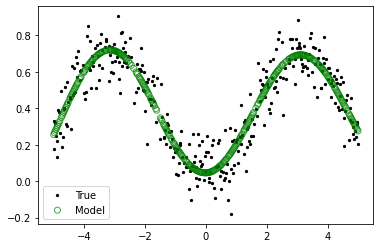

In [9]:
# Visually inspect model fit on test set
yp = model(xtest)
plt.scatter(xtest, ytest, c='k', s=5, label='True')
plt.scatter(xtest, yp.detach().numpy(), facecolors='none', edgecolors='g', alpha=0.7, label='Model')
plt.legend();

In [10]:
# Quantify test set error
print("Test set loss: ", loss_fn(yp, ytest).item())

Test set loss:  0.009668486192822456
